# XD for logAge, [alpha/fe] and [m/h]


In [1]:
import matplotlib
from astroML.crossmatch import crossmatch
from astroML.plotting.tools import draw_ellipse
from astroML.decorators import pickle_results
from astroML.stats import sigmaG

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize = 14, usetex = True)
from astropy.table import Table
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

import sys
sys.path.append("/Users/ioanaciuca/Desktop/MasterFolder/Gaia_DR2/XD_tests/XDGMM/xdgmm/")
sys.path.append("/Users/ioanaciuca/Desktop/MasterFolder/Gaia_DR2/XD_tests/extreme-deconvolution/py/")
from xdgmm import XDGMM

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = Table.read('./data/SD_pred_highquality.fits')
data_disk_not_halo = (data['M_H_1'] > -1.0)
data= data[data_disk_not_halo]

In [ ]:
mask1 = (data['Rc_2'] < 5)
mask2 = ((data['Rc_2'] >= 5) & (data['Rc_2'] < 7))
mask3 = ((data['Rc_2'] >=7) & (data['Rc_2'] < 9))
mask4 = ((data['Rc_2'] >= 9) & (data['Rc_2'] < 11))
mask5 = (data['Rc_2'] >= 11)

In [2]:
data = data[mask5]

NameError: name 'data' is not defined

In [5]:
alpha_m = np.array(data['ALPHA_M_1'])
mh = np.array(data['M_H_1'])
logAge = np.array(data['pred_logAge'])

alpham_err = np.array(data['ALPHA_M_ERR_1'])
mh_err = np.array(data['M_H_ERR_1'])
logAge_err = np.array(data['pred_logAge_std'])

X = np.vstack([mh, alpha_m, logAge]).T
Xerr = np.zeros(X.shape + X.shape[-1:])
diag = np.arange(X.shape[-1])
Xerr[:, diag, diag] = np.vstack([mh_err ** 2, alpham_err ** 2, logAge_err ** 2]).T

In [6]:
xdgmm = XDGMM(method = 'Bovy')

n_components = int(raw_input("Insert number of components: \n >>"))

pickle_name = "./pkl_files/xd_logAge_ncomp%s.pkl" % int(n_components)

@pickle_results(pickle_name)

def do_xdgmm(clf = xdgmm, X = X, Xerr = Xerr):
    
    clf.n_components = n_components
    clf.fit(X, Xerr)

    return clf

clf = do_xdgmm(clf = xdgmm, X = X, Xerr = Xerr)

Insert number of components: 
 >>10
@pickle_results: computing results and saving to './pkl_files/xd_logAge_ncomp10.pkl'


0  component mu, C = [-0.25458966  0.0803333 ] [[ 0.09805311 -0.01310838]
 [-0.01310838  0.00603675]]  l,b mu, C= [0.54501295] [[0.11755171]]
1  component mu, C = [-0.15226282  0.11194006] [[ 0.07728653 -0.01059952]
 [-0.01059952  0.00175924]]  l,b mu, C= [1.0910275] [[0.00087707]]
2  component mu, C = [-0.17085103  0.04252958] [[ 0.03691579 -0.00416643]
 [-0.00416643  0.00054895]]  l,b mu, C= [0.9293928] [[0.00664399]]
3  component mu, C = [0.01030292 0.03364754] [[ 0.02498259 -0.00085911]
 [-0.00085911  0.00153599]]  l,b mu, C= [0.99432352] [[0.00426597]]
4  component mu, C = [-0.14053493  0.02138147] [[ 0.02400386 -0.0030122 ]
 [-0.0030122   0.00045047]]  l,b mu, C= [0.63762182] [[0.01154702]]
5  component mu, C = [-0.63871244  0.22687566] [[ 0.02138584 -0.00214309]
 [-0.00214309  0.00041057]]  l,b mu, C= [1.16547322] [[0.00047877]]
6  component mu, C = [-0.29976742  0.18852226] [[ 0.01997031 -0.00358625]
 [-0.00358625  0.00088277]]  l,b mu, C= [1.13842644] [[0.00056745]]
7  compone

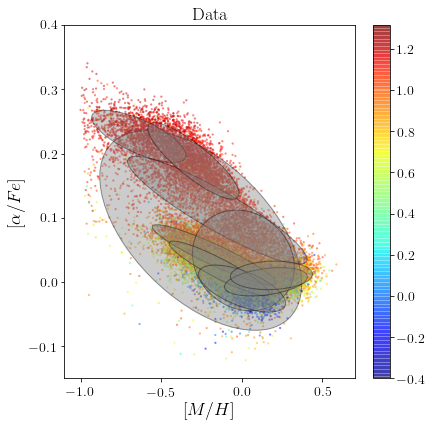

In [9]:
X_sample = clf.sample(X.shape[0])

import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, 1, figsize=(6.5, 6.5))

im1 = ax1.scatter(X[:, 0], X[:, 1], s=5, c=logAge, cmap='jet', alpha=0.5, lw=0)

   
#ax2.scatter(X_sample[:, 0], X_sample[:, 1], s=9, lw=0, c='k', alpha=0.5)

# print "clf", clf.mu[0, 0:2]
# print "V", clf.V[0, 0:2, 0:2]

# sourt with length of principle component
sortindx = np.argsort(clf.V[:,0,0])
sortindx = sortindx[::-1]
for i in range( clf.n_components):
    ic = sortindx[i]
    print i,' component mu, C =',clf.mu[ic,0:2], clf.V[ic, 0:2, 0:2], \
      ' l,b mu, C=',clf.mu[ic, 2:4], clf.V[ic, 2:4, 2:4]
    draw_ellipse(clf.mu[ic, 0:2], clf.V[ic, 0:2, 0:2], scales=[2],
                 ec='k', fc='gray', alpha=0.4, ax=ax1)
        
    #ax3.scatter(pmra_dwarf, pmdec_dwarf, color = 'r', s = 1)
    

ax1.set_ylim(-0.15, 0.4)
ax1.set_xlim(-1.1, 0.7)

#ax2.set_ylim(-0.15, 0.4)
#ax2.set_xlim(-1.1, 0.7)

fig.colorbar(im1, ax=ax1)

ax1.set_ylabel(r"$\normalfont [{\alpha}/Fe]$", fontsize=18)

ax1.set_xlabel(r"$\normalfont [M/H]$", fontsize=18)
#ax2.set_xlabel(r"$\normalfont [M/H]$", fontsize=18)

ax1.set_title("Data", fontsize=18)

#ax2.set_title("XD cluster location", fontsize=18)

plt.savefig('/Users/ioanaciuca/Desktop/all_with_ellipses_10Comp.png')